In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\123\Downloads\hotel_bookings 2.csv")  

In [6]:
df.head

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [39]:
df.shape

(119390, 32)

In [40]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [45]:


# Convert 'reservation_status_date' to datetime with custom format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')


In [46]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166


In [51]:
for column in df.describe(include='object').columns:
    print(column)
    print(df[column].unique())
    print('-' * 50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340


In [10]:

numerical_columns = ['agent', 'company']
categorical_columns = ['children', 'country']  

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
# reCheck for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr         

In [56]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


In [13]:

# Function to detect and handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df, outliers




In [19]:

# Function to detect and handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df, outliers

# Specify the column(s) for outlier detection and handling
columns_to_handle = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
                     'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
                     'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
                     'total_of_special_requests']

# Handle outliers for each specified column
for col in columns_to_handle:
    cleaned_df, outliers = handle_outliers_iqr(df, col)
    
    # Print the statistics and details about outliers
    print(f"Column: {col}")
    print("Statistics before handling outliers:")
    print(df[col].describe())
    print("Statistics after handling outliers:")
    print(cleaned_df[col].describe())
    print("Outliers:")
    print(outliers)
    print("\n")




Column: lead_time
Statistics before handling outliers:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64
Statistics after handling outliers:
count    116385.000000
mean         95.237995
std          92.495678
min           0.000000
25%          17.000000
50%          66.000000
75%         152.000000
max         373.000000
Name: lead_time, dtype: float64
Outliers:
               hotel  is_canceled  lead_time  arrival_date_year  \
1       Resort Hotel            0        737               2015   
225     Resort Hotel            0        394               2015   
890     Resort Hotel            0        460               2015   
1516    Resort Hotel            0        381               2015   
1672    Resort Hotel            0        382               2015   
...              ...          ...        ...                ...  

In [20]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values")


Column 'hotel' has 2 unique values
Column 'is_canceled' has 2 unique values
Column 'lead_time' has 479 unique values
Column 'arrival_date_year' has 3 unique values
Column 'arrival_date_month' has 12 unique values
Column 'arrival_date_week_number' has 53 unique values
Column 'arrival_date_day_of_month' has 31 unique values
Column 'stays_in_weekend_nights' has 17 unique values
Column 'stays_in_week_nights' has 35 unique values
Column 'adults' has 14 unique values
Column 'children' has 5 unique values
Column 'babies' has 5 unique values
Column 'meal' has 5 unique values
Column 'country' has 177 unique values
Column 'market_segment' has 8 unique values
Column 'distribution_channel' has 5 unique values
Column 'is_repeated_guest' has 2 unique values
Column 'previous_cancellations' has 15 unique values
Column 'previous_bookings_not_canceled' has 73 unique values
Column 'reserved_room_type' has 10 unique values
Column 'assigned_room_type' has 12 unique values
Column 'booking_changes' has 21 un

In [21]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                

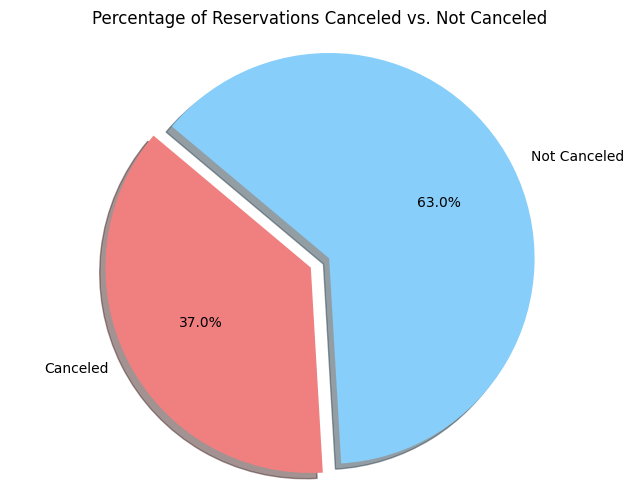

In [58]:
import matplotlib.pyplot as plt

# Calculate the total number of reservations
total_reservations = len(df)

# Calculate the number of canceled reservations
canceled_reservations = df['is_canceled'].sum()

# Calculate the number of not canceled reservations
not_canceled_reservations = total_reservations - canceled_reservations

# Calculate the percentage of canceled and not canceled reservations
percentage_canceled = (canceled_reservations / total_reservations) * 100
percentage_not_canceled = (not_canceled_reservations / total_reservations) * 100

# Pie chart
labels = 'Canceled', 'Not Canceled'
sizes = [percentage_canceled, percentage_not_canceled]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Reservations Canceled vs. Not Canceled')
plt.show()


C:\Users\123\AppData\Local\Temp\ipykernel_13272\240057089.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Resort Hotel', 'City Hotel'], y=[resort_cancel_rate, city_cancel_rate], palette='pastel')


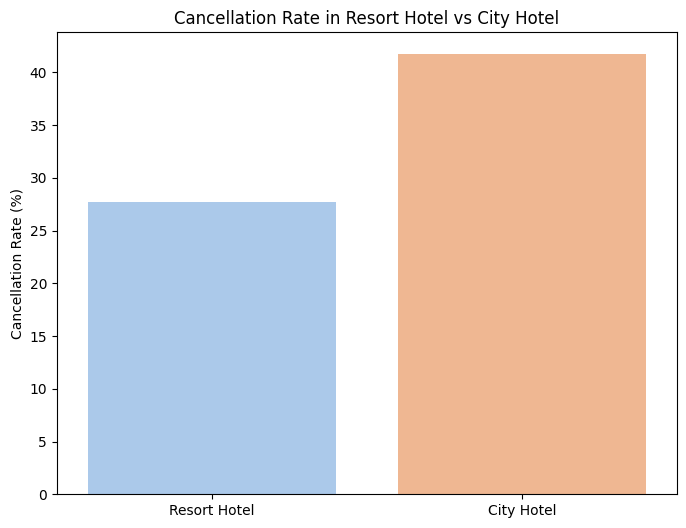

In [59]:


# Filter the DataFrame for resort hotels and city hotels
resort_data = df[df['hotel'] == 'Resort Hotel']
city_data = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates for resort and city hotels
resort_cancel_rate = (resort_data['is_canceled'].sum() / len(resort_data)) * 100
city_cancel_rate = (city_data['is_canceled'].sum() / len(city_data)) * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Resort Hotel', 'City Hotel'], y=[resort_cancel_rate, city_cancel_rate], palette='pastel')
plt.title('Cancellation Rate in Resort Hotel vs City Hotel')
plt.ylabel('Cancellation Rate (%)')
plt.show()


In [63]:


# Calculate total reservations and cancellations for each hotel type
resort_total = len(df[df['hotel'] == 'Resort Hotel'])
resort_cancelled = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)].shape[0]

city_total = len(df[df['hotel'] == 'City Hotel'])
city_cancelled = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)].shape[0]

# Calculate cancellation percentages
resort_cancel_percentage = (resort_cancelled / resort_total) * 100
city_cancel_percentage = (city_cancelled / city_total) * 100


# Print cancellation percentages
print("Cancellation Percentage in Resort Hotel: {:.2f}%".format(resort_cancel_percentage))
print("Cancellation Percentage in City Hotel: {:.2f}%".format(city_cancel_percentage))


Cancellation Percentage in Resort Hotel: 27.76%
Cancellation Percentage in City Hotel: 41.73%


In [64]:
# Calculate the average daily rate (ADR) for city hotels
city_adr = df[df['hotel'] == 'City Hotel']['adr'].mean()

# Calculate the average daily rate (ADR) for resort hotels
resort_adr = df[df['hotel'] == 'Resort Hotel']['adr'].mean()

# Print the average daily rates
print("Average Daily Rate (ADR) for City Hotel: {:.2f}".format(city_adr))
print("Average Daily Rate (ADR) for Resort Hotel: {:.2f}".format(resort_adr))


Average Daily Rate (ADR) for City Hotel: 105.30
Average Daily Rate (ADR) for Resort Hotel: 94.95


In [66]:
# Calculate the average daily rate (ADR) for city hotels
city_adr = df[df['hotel'] == 'City Hotel']['adr'].mean()

# Calculate the average daily rate (ADR) for resort hotels
resort_adr = df[df['hotel'] == 'Resort Hotel']['adr'].mean()

# Print the average daily rates
print("Average Daily Rate (ADR) for City Hotel: {:.2f}".format(city_adr))
print("Average Daily Rate (ADR) for Resort Hotel: {:.2f}".format(resort_adr))


Average Daily Rate (ADR) for City Hotel: 105.30
Average Daily Rate (ADR) for Resort Hotel: 94.95


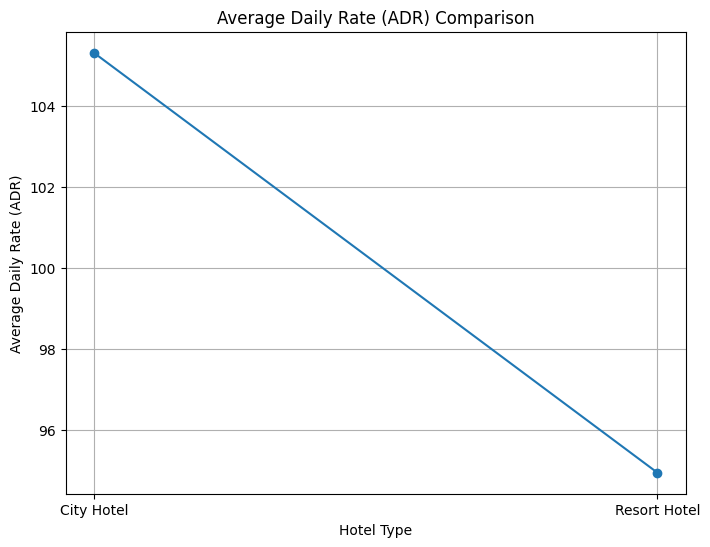

In [69]:


# Calculate the average daily rate (ADR) for city hotels
city_adr = df[df['hotel'] == 'City Hotel']['adr'].mean()

# Calculate the average daily rate (ADR) for resort hotels
resort_adr = df[df['hotel'] == 'Resort Hotel']['adr'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(['City Hotel', 'Resort Hotel'], [city_adr, resort_adr], marker='o', linestyle='-')
plt.title('Average Daily Rate (ADR) Comparison')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()


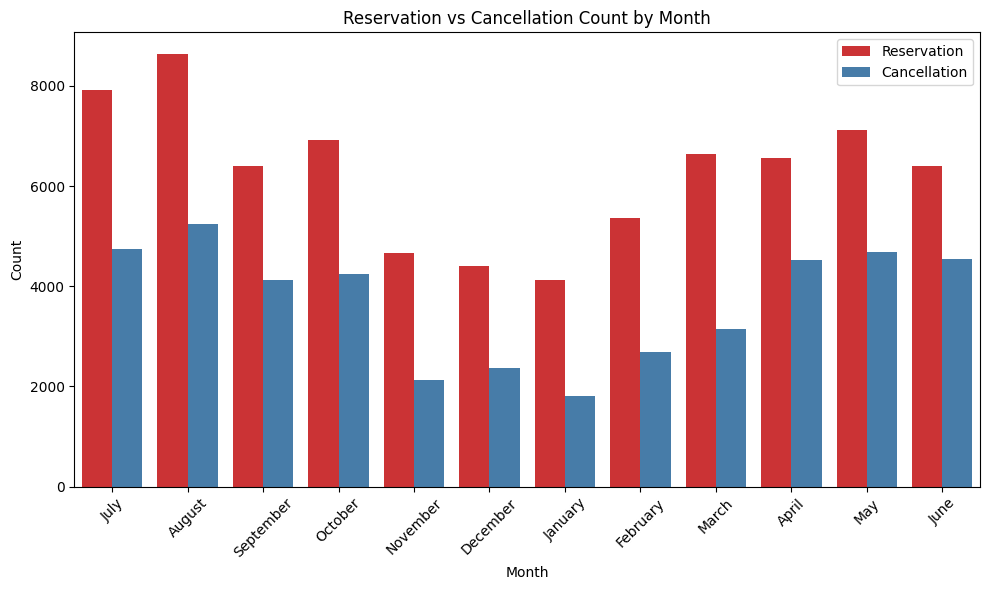

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='Set1')
plt.title('Reservation vs Cancellation Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Reservation', 'Cancellation'])
plt.tight_layout()
plt.show()


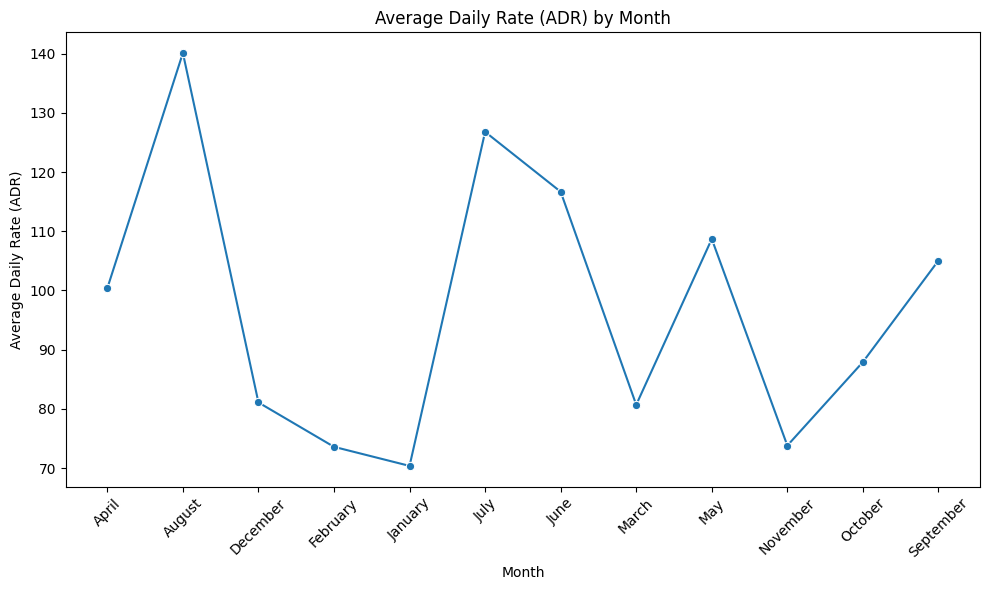

In [71]:
# Calculate the mean ADR for each month
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr', marker='o', sort=False)
plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df['market_segment'].value_counts()


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [74]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

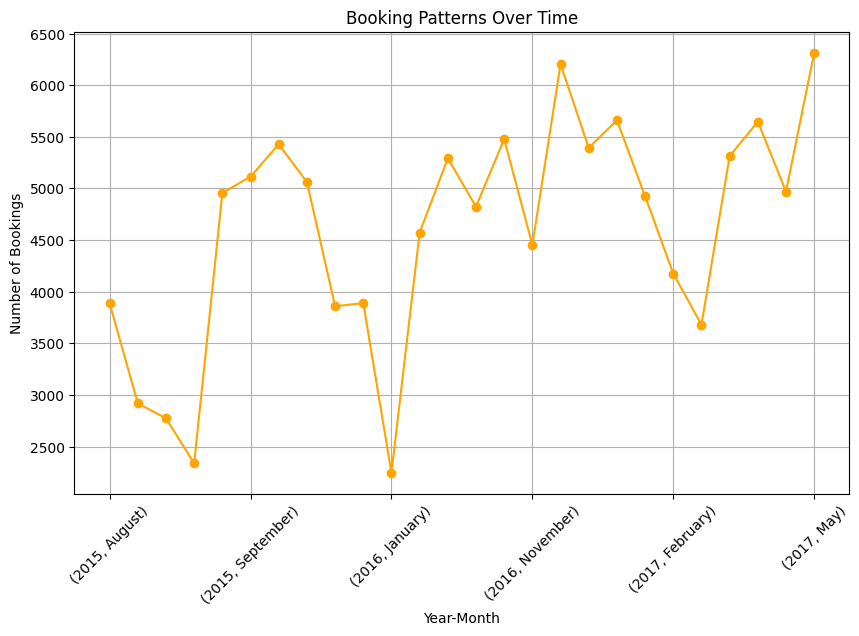

In [23]:
# Example: Line plot of booking patterns over time
plt.figure(figsize=(10, 6))
booking_patterns = df.groupby(['arrival_date_year', 'arrival_date_month']).size()
booking_patterns.plot(kind='line', marker='o', color='orange')
plt.title('Booking Patterns Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

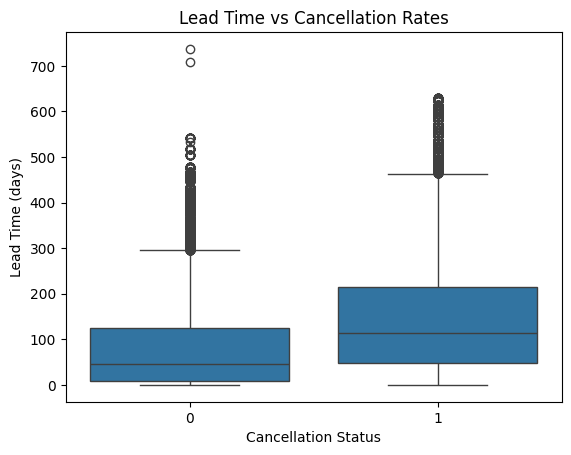

In [24]:
# Challenge 1: Lead Time Impact on Cancellation Rates
# Plotting lead time vs cancellation rates
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation Rates')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time (days)')
plt.show()

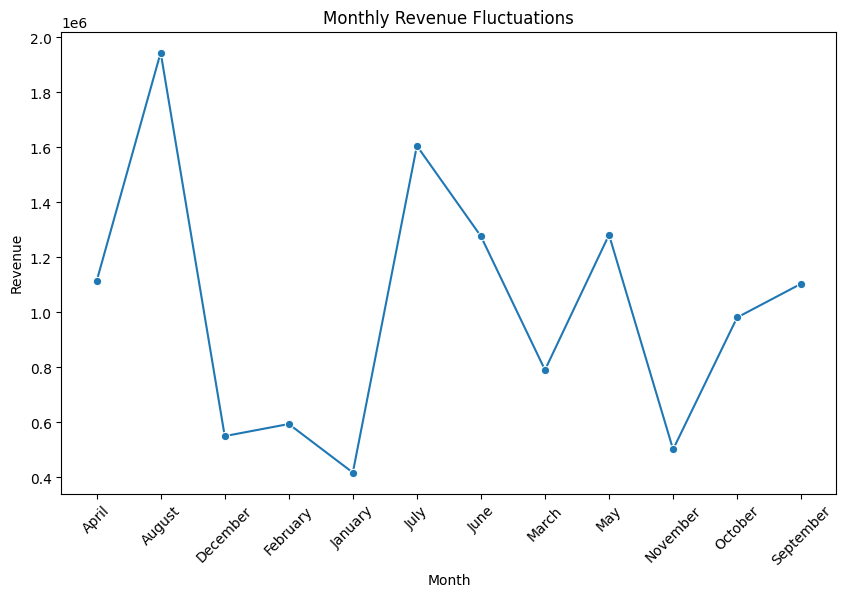

In [25]:
# Challenge 2: Seasonality and Demand Fluctuations
# Plotting monthly revenue fluctuations
monthly_revenue = df.groupby('arrival_date_month')['adr'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Fluctuations')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

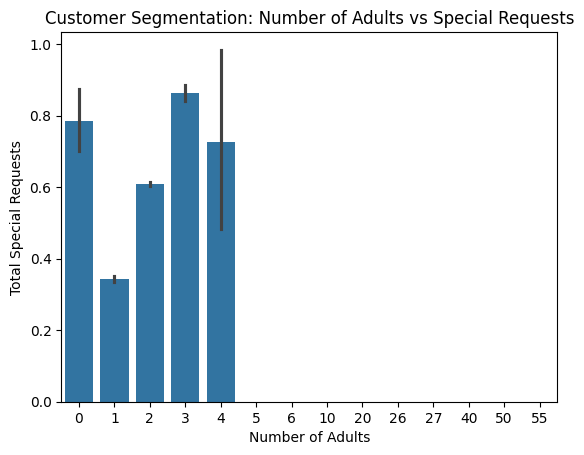

In [27]:
# Challenge 3: Customer Segmentation and Personalization
# Analyzing customer segments and preferences
#  Segmenting customers based on number of adults
sns.barplot(x='adults', y='total_of_special_requests', data=df)
plt.title('Customer Segmentation: Number of Adults vs Special Requests')
plt.xlabel('Number of Adults')
plt.ylabel('Total Special Requests')
plt.show()

In [29]:
# Filter out non-numeric columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns



In [30]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()

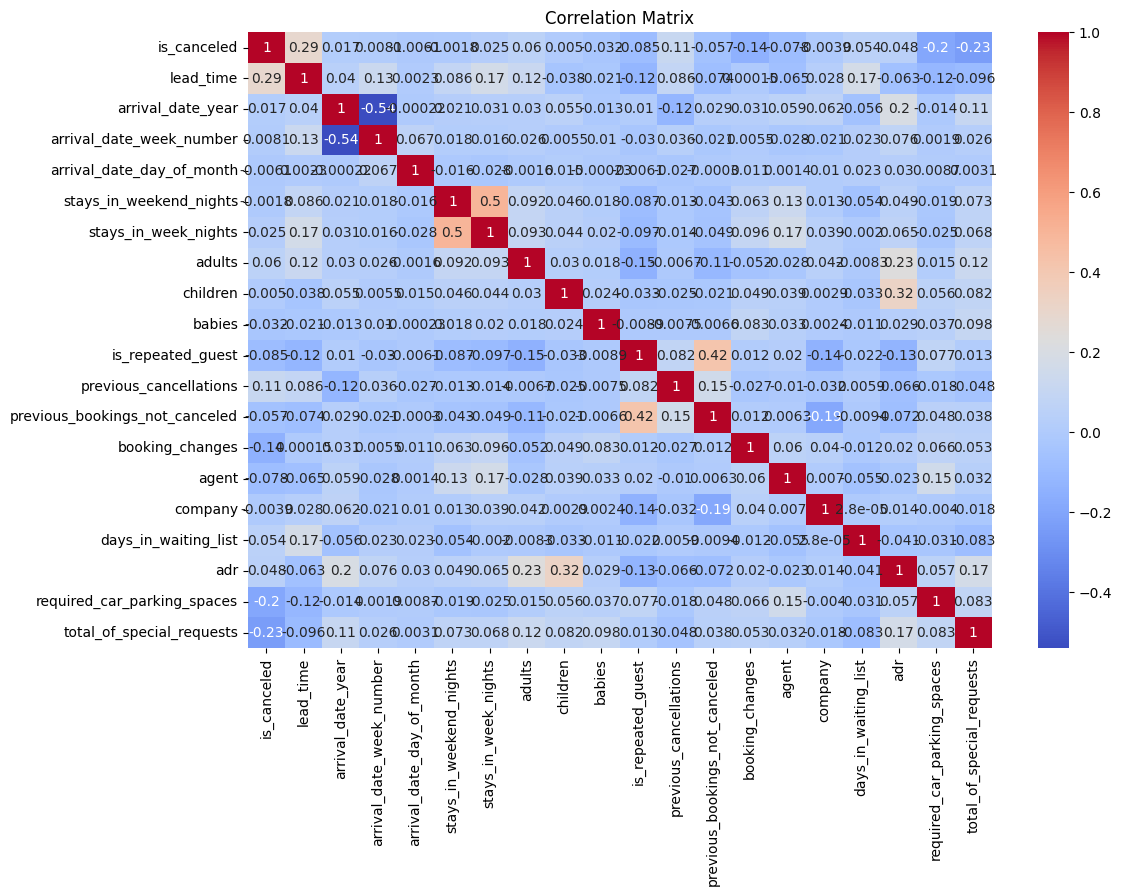

In [31]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()